# WBCD dataset: Impact of the *k* parameter

On this notebook, we present the R code to display the figure XXXXXX of the article [lien_papier].

We focused our analysis on the impact of the parameter *k* in the statistical structure and the security level of the dataset.

We performed two analyses:

    1- Figure of projection comparison.   
    2- Figure of distribution comparison accross k

If you want to look at the evolution of AUROC according to *k* values, open the notebook `messageC_WBCD_python.ipynb`.

## Library import

In [1]:
# Main libraries
library(reticulate)
library(tidyverse)
library(reshape2)
library(mice)

# Multidimensionnal reduction method libary
library(FactoMineR)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




In [2]:
# import specific function to compute metrics 
py_run_string("import sys")
py_run_string("sys.path.append('../..')")

py_run_string("from lsg.security_metrics.security_metrics_class import Security_metrics ")
py_run_string("from lsg.security_metrics.record_to_avatar_distance import record_to_avatar_distance")
py_run_string("from lsg.security_metrics.local_cloaking import local_cloaking")
py_run_string("from lsg.security_metrics.avatars_are_first_hit import avatars_are_first_hit")
py_run_string("from lsg.security_metrics.hidden_rate import hidden_rate")

## Data loading

In [3]:
save <- FALSE

In [13]:
file_data <- "../../datasets/"
file_results <- "../../figure/"

In [5]:
data <- read.csv(paste0(file_data, "breast_cancer_wisconsin.csv"), sep = ",", na.strings = c("NA", "", NA))
data <- data[,-1]

seq_k = c(4, 50, 100, 150, 200, 300)

## Graphical parameters

In [6]:
colors <- read.csv("../../color.csv", stringsAsFactors = FALSE)
rownames(colors) <- colors$type

In [7]:
axis_title_size <- 16
axis_text_size <- 15
legend_text_size <- 16
legend_title_size <- 16

## Projection 

We performed 2 FAMD, small *k* value (i.e. 1/10% of the total number of individuals) and high *k* value (i.e. 40/50% of the total number of individuals).

In [14]:
# Small k
k <- 4 ; iter <- 5

tryCatch(
    {
        avatar_tot <- read.table(paste0(file_data, "tmp/wbcd_avatarized/k", k, "_wbcd_avatarized.csv"),
                         sep = ",", header = TRUE)
    },
    error = function(cnd){
        print("The dataset was not extracted")
        untar(paste0(file_data,"WBCD/wbcd_avatarized.tar.bz2"), 
              files= paste0("./wbcd_avatarized/k", k, "_wbcd_avatarized.csv"), 
              exdir = paste0(file_data, "tmp/"))
        avatar_tot <- read.table(paste0(file_data, "tmp/wbcd_avatarized/k", k, "_wbcd_avatarized.csv"),
                                 sep = ",", header = TRUE)
    }
)

avatar_small <- avatar_tot[avatar_tot$iter_k == iter,]

Warning message in file(file, "rt"):
“cannot open file '../../datasets/tmp/wbcd_avatarized/k4_wbcd_avatarized.csv': No such file or directory”


[1] "The dataset was not extracted"


In [15]:
# high k
k <- 342 ; iter <- 5 
tryCatch(
    {
        avatar_tot <- read.table(paste0(file_data, "tmp/wbcd_avatarized/k", k, "_wbcd_avatarized.csv"),
                         sep = ",", header = TRUE)
    },
    error = function(cnd){
        print("The dataset was not extracted")
        untar(paste0(file_data,"WBCD/wbcd_avatarized.tar.bz2"), 
              files= paste0("./wbcd_avatarized/k", k, "_wbcd_avatarized.csv"), 
              exdir = paste0(file_data, "tmp/"))
        avatar_tot <- read.table(paste0(file_data, "tmp/wbcd_avatarized/k", k, "_wbcd_avatarized.csv"),
                                 sep = ",", header = TRUE)
    }
)
avatar_high <- avatar_tot[avatar_tot$iter_k == iter,]

Warning message in file(file, "rt"):
“cannot open file '../../datasets/tmp/wbcd_avatarized/k342_wbcd_avatarized.csv': No such file or directory”


[1] "The dataset was not extracted"


In [16]:
# binding original, small k avatar and high k avatar datasets. 
data_small_high <- rbind(data[, 1:10], avatar_small[, 1:10], avatar_high[, 1:10])
data_small_high$Class <- as_factor(data_small_high$Class)

row.names(data_small_high) <- 1:nrow(data_small_high)

# Perform FAMD in the priginal data space
FAMD <- FAMD(data_small_high, ncp = 5, graph = FALSE, ind.sup = (nrow(data_small_high)/3 + 1):nrow(data_small_high))
res_ind <- as.data.frame(FAMD$ind.sup$coord)[1:683,]
res_ind_sup <- as.data.frame(FAMD$ind.sup$coord)[684:1366,]

## 2D projection


In [17]:
res_ind_2D <- res_ind[,1:2]
res_ind_2D['type'] <- 'k = 4'
res_ind_sup['type'] <- 'k = 342'
res_ind_2D <- rbind(res_ind_2D, res_ind_sup[, c('Dim.1', 'Dim.2', 'type')])

set.seed(42)
rows <- sample(nrow(res_ind_2D))
res_ind_2D <- res_ind_2D[rows,]

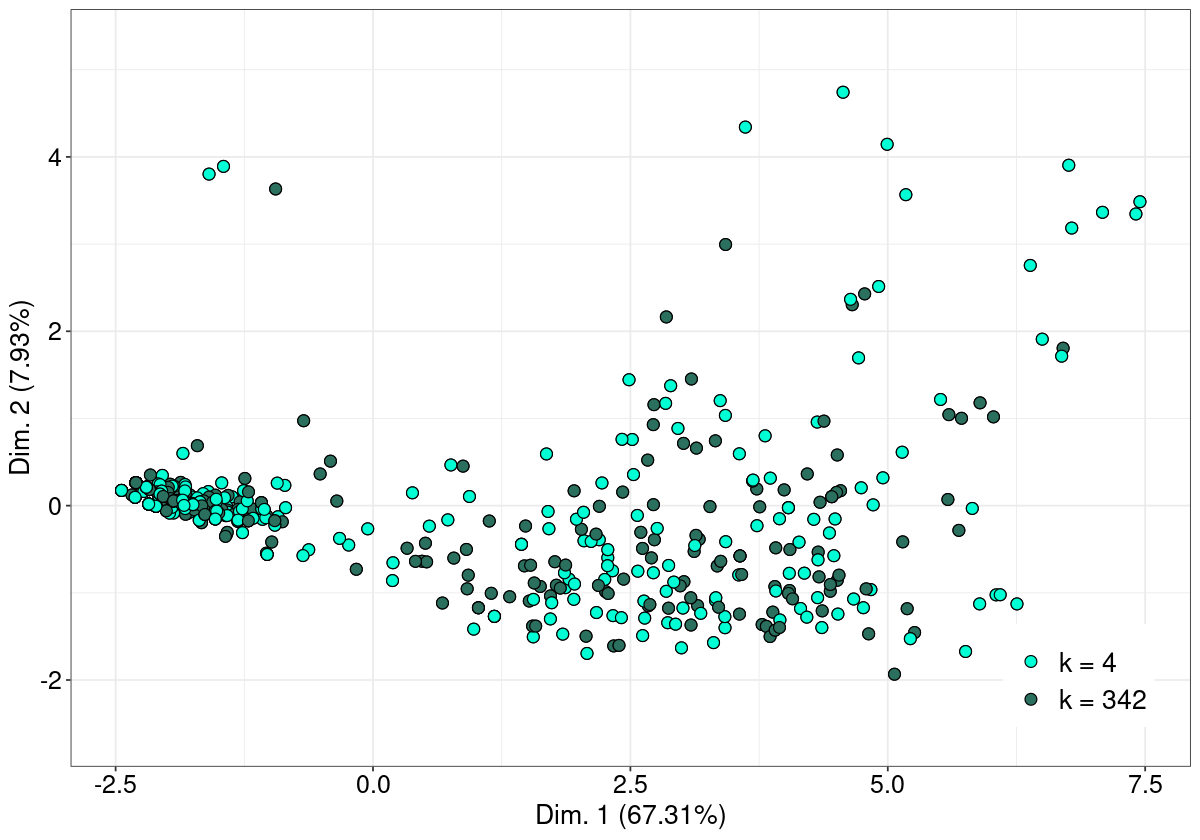

In [18]:
options(repr.plot.width = 10, repr.plot.height = 7)

plot <- ggplot(res_ind_2D, aes(x = Dim.1, y = Dim.2, fill = type)) +
    geom_point(size = 3, shape = 21, alpha = 1) +
    aes(fill = factor(type)) + 
    scale_fill_manual(values=c('k = 4' = colors["k_small", "color"], 'k = 342' = colors["k_high", "color"])) +
    xlab(paste0("Dim. 1 (", round(FAMD$eig[1,2], 2) ,"%)")) +
    ylab(paste0("Dim. 2 (", round(FAMD$eig[2,2], 2) ,"%)")) +
    labs(fill = "") +
    theme_bw() +
    ylim(c(-2.6, 5.3)) + 
    theme(legend.position = c(0.9, 0.12), 
          legend.title = element_blank(),
          legend.key.size = unit(0.8, "cm"),
          legend.text = element_text(size = legend_text_size, color = "black", family = "sans"),
          axis.text = element_text(size =  axis_text_size, color = "black", family = "sans"),
          axis.title = element_text(size = axis_title_size, color = "black", family = "sans"))

plot 

#ggsave(file="../../figure/WBCD_pca2D_Ksmall_high.svg", plot = plot, width = 10, height = 7, dpi = 320)

## For different *k*: local cloaking computation

This section provides the computation of protection metrics (local cloaking).

We first computed metrics, which need the security metrics specifique function.
Then, we displayed the distribution of the local cloaking for different *k* values.

In [20]:
str(data)

'data.frame':	683 obs. of  10 variables:
 $ Clump_Thickness            : int  5 5 3 6 4 8 1 2 2 4 ...
 $ Uniformity_of_Cell_Size    : int  1 4 1 8 1 10 1 1 1 2 ...
 $ Uniformity_of_Cell_Shape   : int  1 4 1 8 1 10 1 2 1 1 ...
 $ Marginal_Adhesion          : int  1 5 1 1 3 8 1 1 1 1 ...
 $ Single_Epithelial_Cell_Size: int  2 7 2 3 2 7 2 2 2 2 ...
 $ Bare_Nuclei                : int  1 10 2 4 1 10 10 1 1 1 ...
 $ Bland_Chromatin            : int  3 3 3 3 3 9 3 3 1 2 ...
 $ Normal_Nucleoli            : int  1 2 1 7 1 7 1 1 1 1 ...
 $ Mitoses                    : int  1 1 1 1 1 1 1 1 5 1 ...
 $ Class                      : int  2 2 2 2 2 4 2 2 2 2 ...


In [21]:
df_local_cloaking_k100 <- data.frame(row.names = 1:nrow(data))
data$Class <- as_factor(data$Class)

hidden_rate_list <- c()

# Original projection
coord_original <- FAMD(data, ncp = 2)
coord_original <- as.data.frame(coord_original$ind$coord)

Warning message:
“ggrepel: 619 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 619 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [14]:
for (k in seq_k) {
    iter <- 1
    tryCatch(
    {
        avatar_tot <- read.table(paste0(file_data, "tmp/wbcd_avatarized/k", k, "_wbcd_avatarized.csv"),
                         sep = ",", header = TRUE)
    },
    error = function(cnd){
        print("The dataset was not extracted")
        untar(paste0(file_data,"WBCD/wbcd_avatarized.tar.bz2"), 
              files= paste0("./wbcd_avatarized/k", k, "_wbcd_avatarized.csv"), 
              exdir = paste0(file_data, "tmp/"))
        avatar_tot <- read.table(paste0(file_data, "tmp/wbcd_avatarized/k", k, "_wbcd_avatarized.csv"),
                                 sep = ",", header = TRUE)
    }
)
    avatar <- avatar_tot[avatar_tot$iter_k == iter,]
    coord_avatar <- FAMD(rbind(data, , ncp = 2)
    
    # Local cloaking
    distances <- py$record_to_avatar_distance(coord_original, coord_avatar)
    local_cloaking <- py$local_cloaking(coord_original, coord_avatar, distances)
    df_local_cloaking_k100[paste0("local_cloaking_", k)] <- local_cloaking$hit_counts[,1]
    
    # Hidden rate
    are_first_hit <- py$avatars_are_first_hit (coord_original, coord_avatar, distance_metric = 'euclidean')
    hidden_rate <- py$hidden_rate(are_first_hit)
    hidden_rate_list <- c(hidden_rate_list, hidden_rate)
}

In [15]:
df_local_cloaking_k100["Class"] <- data$Class

In [16]:
df_melt <- melt(df_local_cloaking_k100, id.vars = 'Class')

hidden_rate_list <- rep(hidden_rate_list, each = 683)
df_melt['hidden_rate'] <- hidden_rate_list

### Violin plot 
We performed a violin plot for different *k* values.

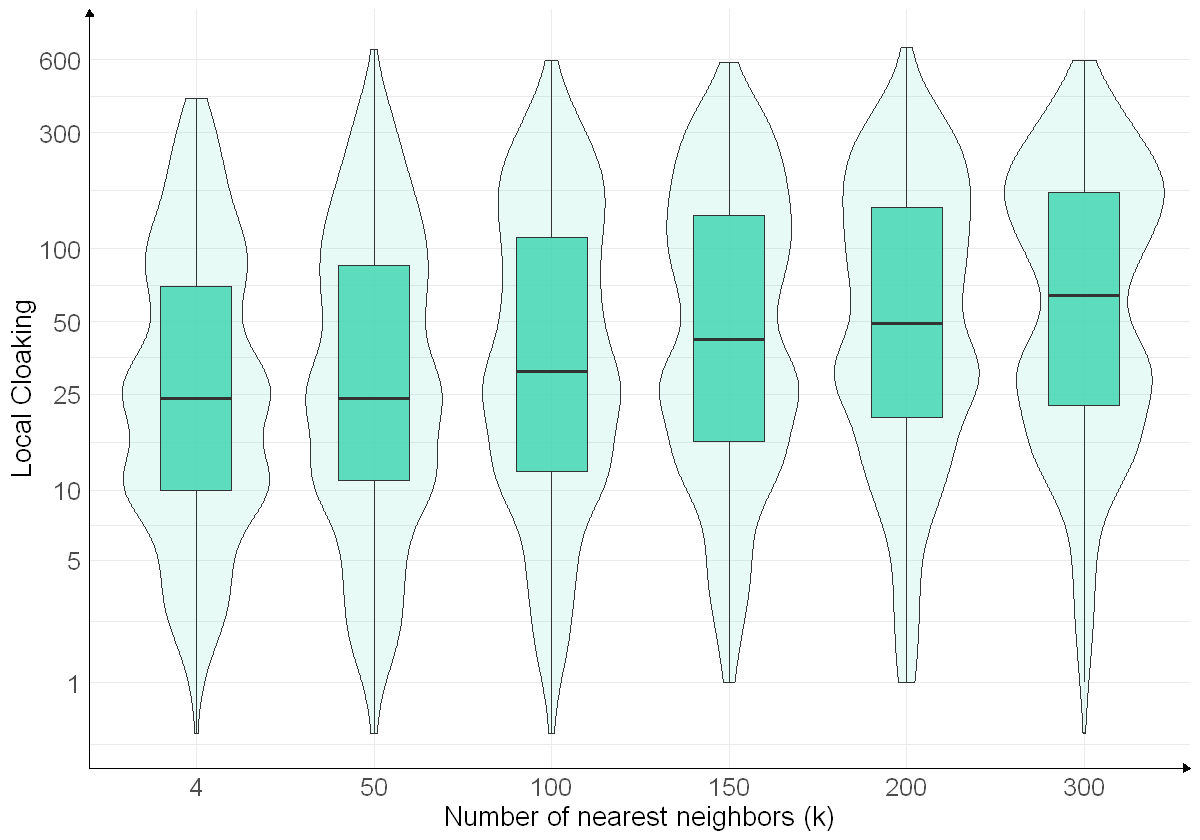

In [17]:
options(repr.plot.width = 10, repr.plot.height = 7)

plot <- ggplot(df_melt, aes(x = variable, fill = factor(Class), y = value)) + 
    geom_violin(trim = TRUE, alpha = 0.12, fill = colors['avatar', 'color'])+
    geom_boxplot(width = 0.4, fill = colors['avatar', 'color'], outlier.size = 0.1, alpha = 0.8) +
    scale_x_discrete(labels = as.character(seq_k)) +
    scale_y_continuous(trans = scales::pseudo_log_trans(base = 10), breaks = c(1, 5, 10, 25, 50, 100, 300, 600)) +
    xlab("Number of nearest neighbors (k)") +
    ylab("Local Cloaking") +
    theme_minimal() +  
    theme(legend.position = "right",
          axis.title.y = element_text(angle = 90, vjust = 1, size = axis_title_size),
          axis.text = element_text(size = axis_text_size), 
          axis.title.x = element_text(size = axis_title_size),
          axis.line = element_line(colour = "black", size = 0.5, linetype = "solid", 
                                   arrow = arrow(type = 'closed', length = unit(5, 'pt'))))+ 
    coord_cartesian(ylim = c(0, 700))

plot

#ggsave(file = "../../figure/WBCD_localCloaking_violinplot.svg", plot = plot, width = 10, height = 7)